# Regression_Support Vector Machine

In [1]:
import pandas as pd

In [2]:
pd.read_csv('reg_data/abalone.data')

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('reg_data/abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight',
                        'Shucked weight','Viscera weight','Shell weight','Rings'])

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df['Sex'] = df['Sex'].replace(('I','M','F'),(0,1,2))
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
X, y

(      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
 0       1   0.455     0.365   0.095        0.5140          0.2245   
 1       1   0.350     0.265   0.090        0.2255          0.0995   
 2       2   0.530     0.420   0.135        0.6770          0.2565   
 3       1   0.440     0.365   0.125        0.5160          0.2155   
 4       0   0.330     0.255   0.080        0.2050          0.0895   
 ...   ...     ...       ...     ...           ...             ...   
 4172    2   0.565     0.450   0.165        0.8870          0.3700   
 4173    1   0.590     0.440   0.135        0.9660          0.4390   
 4174    1   0.600     0.475   0.205        1.1760          0.5255   
 4175    2   0.625     0.485   0.150        1.0945          0.5310   
 4176    1   0.710     0.555   0.195        1.9485          0.9455   
 
       Viscera weight  Shell weight  
 0             0.1010        0.1500  
 1             0.0485        0.0700  
 2             0.1415        0.2100  
 3    

In [7]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=7)

In [8]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((3341, 8), (836, 8), (3341,), (836,))

## SVM - regression

In [9]:
from sklearn import svm

clf = svm.SVR()
clf.fit(X_tr, y_tr)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [10]:
y_pred = clf.predict(X_te)

## Evaluate

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
mean_squared_error(y_te, y_pred)

5.893724743961028

In [13]:
r2_score(y_te, y_pred)

0.47479014130906194

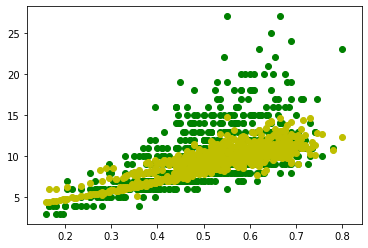

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X_te.iloc[:,1], y_te, color='g')
plt.scatter(X_te.iloc[:,1],y_pred, color='y')
plt.show()